In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [3]:
def multi_gaussian(pos, mu, si):
  n = mu.shape[0]
  Sig_det = np.linalg.det(si)
  Sig_inv = np.linalg.inv(si)
  N = np.sqrt((2*np.pi)**n * Sig_det)
  fac = np.einsum('...k,kl,...l->...', pos-mu, Sig_inv,pos-mu)
  return np.exp(-fac/2)/N

In [4]:
global Gaussian_Matrix
Gaussian_Matrix=[]

In [5]:
def gauss(x,y):
    mu = np.array([x,y])
    sd=np.std([640,480])
    Sigma = np.array([[sd,0],[0,sd]])
    X=np.linspace(0,640,640)
    Y=np.linspace(0,480,480)
    X, Y = np.meshgrid(X,Y)
    print(X.shape+(2,))
    pos = np.empty(X.shape+(2,))
    pos[:,:,0] = X
    pos[:,:,1] = Y
    Z = multi_gaussian(pos, mu, Sigma)
    plt.imshow(Z)
    plt.show()
    Gaussian_Matrix.append(Z)

(480, 640, 2)


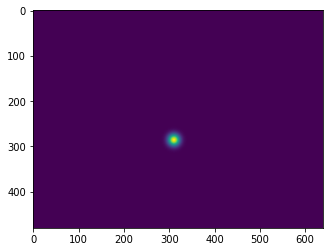

(480, 640, 2)


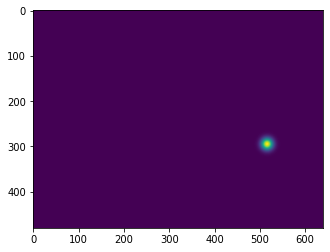

(480, 640, 2)


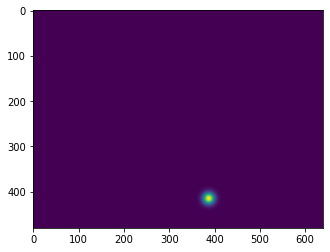

In [6]:
from tkinter import *
from tkinter import filedialog
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Capture_Events(event,x,y,flags,params):
    if event == cv2.EVENT_LBUTTONDOWN:
        gauss(x,y)

if __name__ == "__main__":
    global fln 
    fln=filedialog.askopenfilename(initialdir=os.getcwd(),title="Select Image File",filetypes=(("ALL FILES","*"),("JPG file","*.jpg"),("PNG file","*.png")))

    img = cv2.imread(fln,1)

    cv2.imshow('image',img)
    cv2.setMouseCallback('image',Capture_Events)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

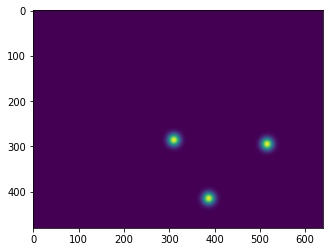

In [7]:
M1M2arr = np.sum(Gaussian_Matrix, axis=0)
plt.imshow(M1M2arr)
cb = plt.imsave("E:\Programming\Project\Gaussian_Plot.jpeg",M1M2arr)

In [8]:
image1=cv2.imread(fln)
image2=cv2.imread("Gaussian_Plot.jpeg")
final=cv2.addWeighted(image1,0.5,image2,0.5,0)
cv2.imwrite("final.jpeg",final)
cv2.imshow("final",final)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
image=cv2.imread("final.jpeg")
# image=M1M2arAr
f_transformation= np.fft.fft2(image)

In [10]:
fshift=np.fft.fftshift(f_transformation)
magnitude_spectrum=20*np.log(np.abs(fshift))
magnitude_spectrum=np.asanyarray(magnitude_spectrum,dtype=np.uint8)
cv2.imshow("Magnitude spectrum",magnitude_spectrum)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\SOUMYA~1\AppData\Local\Temp/ipykernel_26212/1350165749.py:2: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum=20*np.log(np.abs(fshift))
